In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [39]:
df=pd.read_csv("Student_Marks.csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [40]:
# Check for missing values
print(df.isna().sum())

number_courses    0
time_study        0
Marks             0
dtype: int64


In [41]:
# Check data types and column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [42]:
# Define features and target variable
X = df[['number_courses', 'time_study']].values  # Features (2D)
y = df['Marks'].values.reshape(-1, 1)  # Target (reshape to column vector)

In [43]:
X

array([[3.   , 4.508],
       [4.   , 0.096],
       [4.   , 3.133],
       [6.   , 7.909],
       [8.   , 7.811],
       [6.   , 3.211],
       [3.   , 6.063],
       [5.   , 3.413],
       [4.   , 4.41 ],
       [3.   , 6.173],
       [3.   , 7.353],
       [7.   , 0.423],
       [7.   , 4.218],
       [3.   , 4.274],
       [3.   , 2.908],
       [4.   , 4.26 ],
       [5.   , 5.719],
       [8.   , 6.08 ],
       [6.   , 7.711],
       [8.   , 3.977],
       [4.   , 4.733],
       [6.   , 6.126],
       [5.   , 2.051],
       [7.   , 4.875],
       [4.   , 3.635],
       [3.   , 1.407],
       [7.   , 0.508],
       [8.   , 4.378],
       [5.   , 0.156],
       [4.   , 1.299],
       [8.   , 3.864],
       [3.   , 1.923],
       [8.   , 0.932],
       [6.   , 6.594],
       [3.   , 4.083],
       [3.   , 7.543],
       [4.   , 2.966],
       [6.   , 7.283],
       [7.   , 6.533],
       [6.   , 7.775],
       [4.   , 0.14 ],
       [6.   , 2.754],
       [6.   , 3.591],
       [5. 

In [44]:
y

array([[19.202],
       [ 7.734],
       [13.811],
       [53.018],
       [55.299],
       [17.822],
       [29.889],
       [17.264],
       [20.348],
       [30.862],
       [42.036],
       [12.132],
       [24.318],
       [17.672],
       [11.397],
       [19.466],
       [30.548],
       [38.49 ],
       [50.986],
       [25.133],
       [22.073],
       [35.939],
       [12.209],
       [28.043],
       [16.517],
       [ 6.623],
       [12.647],
       [26.532],
       [ 9.333],
       [ 8.837],
       [24.172],
       [ 8.1  ],
       [15.038],
       [39.965],
       [17.171],
       [43.978],
       [13.119],
       [46.453],
       [41.358],
       [51.142],
       [ 7.336],
       [15.725],
       [19.771],
       [10.429],
       [ 9.742],
       [ 8.924],
       [16.703],
       [22.701],
       [26.882],
       [19.106],
       [40.602],
       [22.184],
       [ 7.892],
       [36.653],
       [53.158],
       [18.238],
       [53.359],
       [51.583],
       [31.236

In [45]:
# Standardize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [46]:
X

array([[-1.27897041,  0.18248894],
       [-0.72046805, -1.68619512],
       [-0.72046805, -0.39988653],
       [ 0.39653668,  1.6229682 ],
       [ 1.5135414 ,  1.58146071],
       [ 0.39653668, -0.36684996],
       [-1.27897041,  0.84110266],
       [-0.16196569, -0.28129371],
       [-0.72046805,  0.14098145],
       [-1.27897041,  0.8876927 ],
       [-1.27897041,  1.38747674],
       [ 0.95503904, -1.54769564],
       [ 0.95503904,  0.05966066],
       [-1.27897041,  0.08337923],
       [-1.27897041, -0.49518433],
       [-0.72046805,  0.07744958],
       [-0.16196569,  0.6954029 ],
       [ 1.5135414 ,  0.84830294],
       [ 0.39653668,  1.53910613],
       [ 1.5135414 , -0.04241388],
       [-0.72046805,  0.27778675],
       [ 0.39653668,  0.86778604],
       [-0.16196569, -0.85816308],
       [ 0.95503904,  0.33793025],
       [-0.72046805, -0.18726654],
       [-1.27897041, -1.13092658],
       [ 0.95503904, -1.51169425],
       [ 1.5135414 ,  0.12742799],
       [-0.16196569,

In [47]:

# Add bias term (column of ones) to X
m = len(y)  # Number of training examples
X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 for theta_0 (bias term)

In [48]:
# Initialize parameters (theta values)
theta = np.zeros((X_b.shape[1], 1))  # The number of parameters

# Define learning rate and iterations
learning_rate = 0.01
iterations = 1000



# COST FUNC

In [49]:
# Define gradient descent function
def compute_cost(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

# Gradient descnet

In [50]:
def gradient_descent(X_b, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradients = (1/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X_b, y, theta))

    return theta, cost_history

In [51]:
learning_rate

0.01

In [52]:
theta_optimal, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

In [53]:
theta_optimal

array([[24.41663586],
       [ 3.33914903],
       [12.74591921]])

In [54]:
cost_history

[3916277.034298356,
 3837170.1213387465,
 3759700.1138551496,
 3683832.845811452,
 3609534.8706291215,
 3536773.445899968,
 3465516.5184266856,
 3395732.709584128,
 3327391.3009943594,
 3260462.220508686,
 3194916.028490044,
 3130723.9043892385,
 3067857.633608684,
 3006289.594647432,
 2945992.7465214105,
 2886940.616452921,
 2829107.2878235807,
 2772467.388385028,
 2716996.0787218097,
 2662669.040961018,
 2609462.467723348,
 2557353.051310366,
 2506317.9731228855,
 2456334.8933054814,
 2407381.9406122467,
 2359437.702489038,
 2312481.215367529,
 2266491.955166514,
 2221449.827996,
 2177335.1610597,
 2134128.6937516816,
 2091811.5689429592,
 2050365.3244539702,
 2009771.884708901,
 1970013.5525679851,
 1931073.00133391,
 1892933.2669286053,
 1855577.740236752,
 1818990.1596124058,
 1783154.6035452518,
 1748055.4834830419,
 1713677.5368068633,
 1680005.819955963,
 1647025.7016988941,
 1614722.8565478635,
 1583083.2583131967,
 1552093.1737949022,
 1521739.156608409,
 1492008.0411415868,


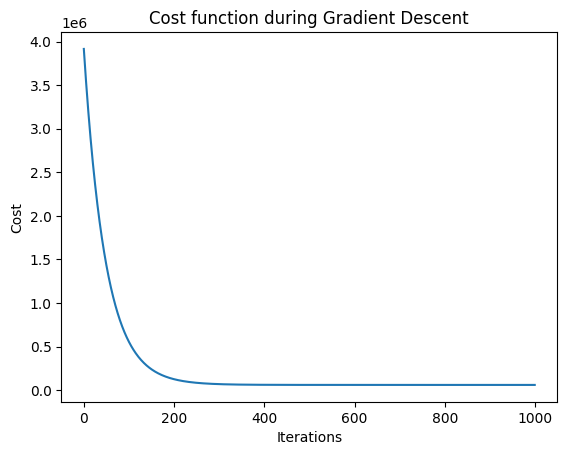

In [55]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost function during Gradient Descent")
plt.show()


In [56]:

predictions = X_b.dot(theta_optimal)

In [57]:
# Evaluating the model
mae = metrics.mean_absolute_error(y, predictions)
mse = metrics.mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

In [58]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.0208550739000337
Mean Squared Error (MSE): 12.116967280896493
Root Mean Squared Error (RMSE): 3.480943446954646


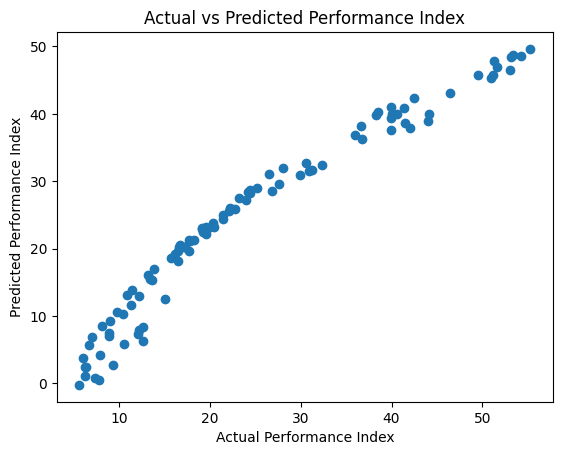

In [59]:
# Plotting the actual vs predicted values
plt.scatter(y, predictions)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.show()


**ploynomial**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split



# Define features and target variable
X = df[['number_courses', 'time_study']].values  # Features
y = df['Marks'].values.reshape(-1, 1)  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data (optional but helps with convergence)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)



In [61]:
# Apply PolynomialFeatures with degree=3
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)  # Apply to training data
X_poly_test = poly.transform(X_test)  # Apply to test data





In [62]:
# Initialize parameters (theta values)
theta = np.zeros((X_poly_train.shape[1], 1))

# Gradient Descent Hyperparameters
learning_rate = 0.01
iterations = 1000
m = len(X_poly_train)



# cost func

In [63]:
# Cost function (Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost




# gradient desc

In [64]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Calculate predictions
        predictions = X.dot(theta)

        # Compute the gradient
        gradients = (1/m) * X.T.dot(predictions - y)

        # Update parameters (theta)
        theta = theta - learning_rate * gradients

        # Calculate and record the cost for the current iteration
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history



In [65]:
# Train the model using gradient descent
theta, cost_history = gradient_descent(X_poly_train, y_train, theta, learning_rate, iterations)



In [66]:
# Print the learned parameters (theta values)
print("Learned theta values (intercept and coefficients):")
print(theta)

Learned theta values (intercept and coefficients):
[[ 1.75355042e+01]
 [ 2.39969789e+00]
 [ 7.03474287e+00]
 [ 1.13932123e+00]
 [-5.33753927e-01]
 [ 4.25614079e+00]
 [ 3.15178511e-04]
 [ 1.05466890e+00]
 [ 9.29630992e-03]
 [ 2.02390083e+00]]


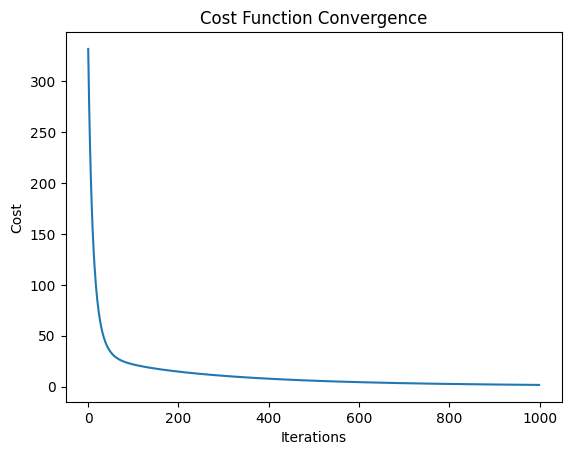

In [67]:
# Plotting the cost function history to visualize convergence
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()



In [68]:
# Predictions on the test set
y_train_pred = X_poly_train.dot(theta)
y_test_pred = X_poly_test.dot(theta)

# Evaluate the model
mse_train = np.mean((y_train_pred - y_train)**2)  # Mean Squared Error for training
mse_test = np.mean((y_test_pred - y_test)**2)  # Mean Squared Error for testing
rmse_train = np.sqrt(mse_train)  # Root Mean Squared Error for training
rmse_test = np.sqrt(mse_test)  # Root Mean Squared Error for testing
print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Training Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test}")

Training Mean Squared Error (MSE): 3.408056221238033
Test Mean Squared Error (MSE): 54.71701007401673
Training Root Mean Squared Error (RMSE): 1.8460921486312738
Test Root Mean Squared Error (RMSE): 7.397094704951176


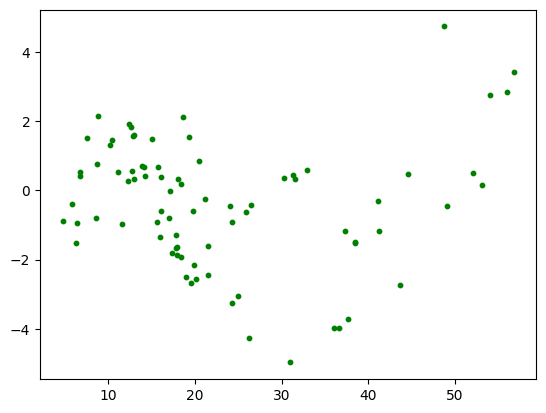

In [69]:


# Plotting the residuals for the training set
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    color="green",
    s=10,
    label="Train data"
)



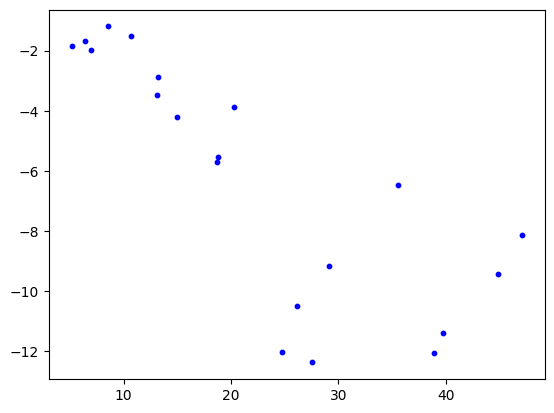

In [70]:
# Plotting the residuals for the test set
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    color="blue",
    s=10,
    label="Test data"
)



<ipython-input-71-4d8b2c26d035>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


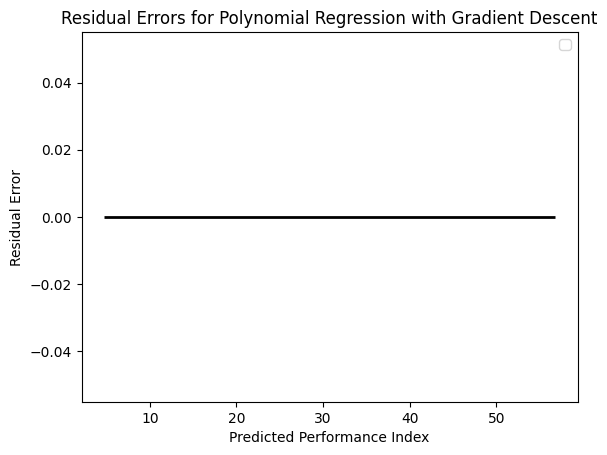

In [71]:
# Plot a horizontal line at y = 0 to indicate zero residual error
plt.hlines(
    y=0,
    xmin=min(y_train_pred.min(), y_test_pred.min()),
    xmax=max(y_train_pred.max(), y_test_pred.max()),
    linewidth=2,
    color="black"
)
# Add title, labels, and legend
plt.title("Residual Errors for Polynomial Regression with Gradient Descent")
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residual Error")
plt.legend(loc="upper right")

# Display the plot
plt.show()
